<img src="im_note/logo2.png" alt="Drawing" style="width: 200px;"/> <img src="im_note/logo.png" alt="Drawing" style="width: 150px;"/> <img src="im_note/logo3.png" alt="Drawing" style="width: 350px;"/>

# Using gaussian processes to forecast VCI

#### -GPs for time series: http://www.robots.ox.ac.uk/~sjrob/Pubs/philTransA_2012.pdf
#### -We use Pyro for our GP fit: http://pyro.ai/examples/gp.html

In [1]:
import plot_func # the functions we use in this notebook

#### We used Landsat to derive weekly NDVI ($\rm{NDVI} = \frac{NIR- red}{NIR+red}$) values for a 1000 randomly selected pixels for all the Pastoral Livelihood-zone county cross sections in Kenya. From the NDVI we dirive the weekly VCI ($\rm{VCI}_i = 100 \times \frac{\rm{NDVI}_i - \rm{NDVI}_{min,i}}{ \rm{NDVI}_{max,i} - \rm{NDVI}_{min,i}}$).

#### This example is for the Baringo county LZ24 cross section 



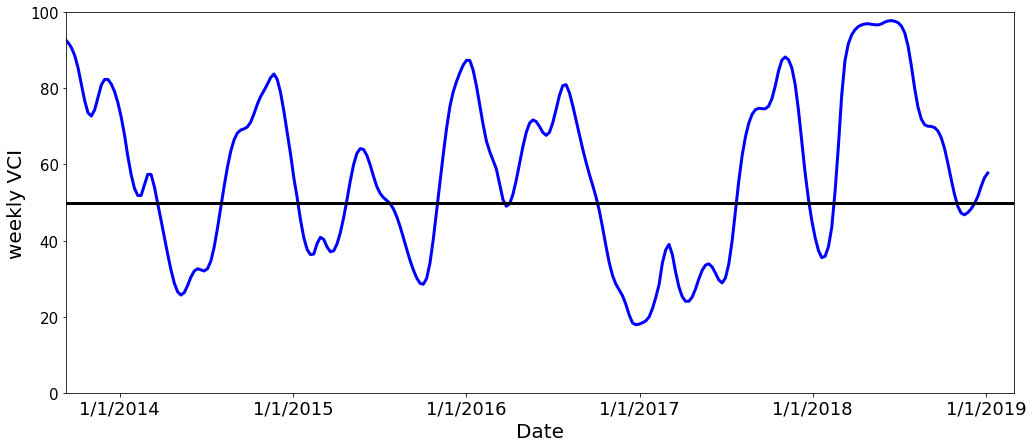

In [2]:
X,y = plot_func.load('im_note/Baringo_Z24_RBFP_an.npy') # X = days since 1/1/2000
plot_func.plot_vci(X,y)                                 # y = VCI as measured by Landsat

In [3]:
# training the GP, using an RBF kernel on X and y
# mean contains the GP prediction at week Xtest_use
mean, Xtest_use = plot_func.run_GP(X,y)

#### The next plot will show the VCI predictions in red. We use the GP to estimate the VCI at every week (X) where we have a VCI observation (y). We also use the GP to predict the VCI 1 to 8 weeks ahead. 

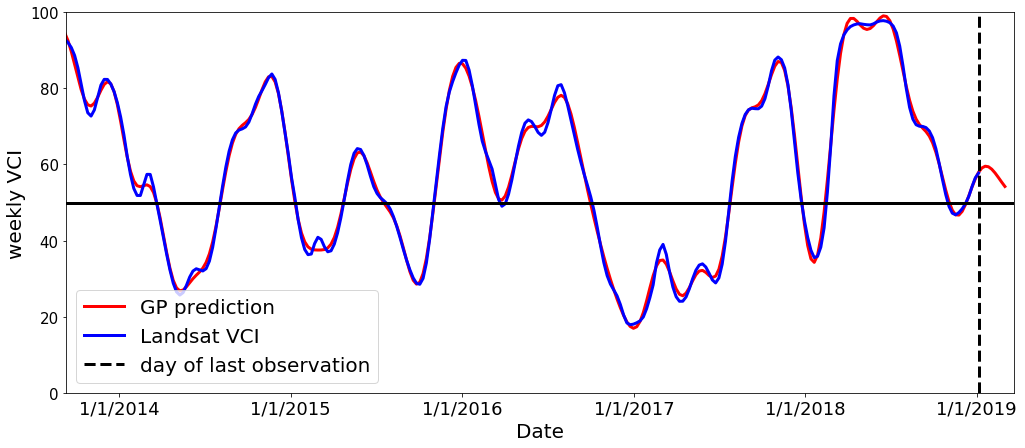

In [4]:
plot_func.plot_vci_fc(Xtest_use,mean,X,y)

#### A 3 month average VCI is currently being used as a drought indicator by NDMA, we convert our weekly VCI to VCI3M by taking the average VCI over the last 3 month period.

weeks =  1 ,   VCI =  59
weeks =  2 ,   VCI =  60
weeks =  3 ,   VCI =  59
weeks =  4 ,   VCI =  59
weeks =  5 ,   VCI =  58
weeks =  6 ,   VCI =  57
weeks =  7 ,   VCI =  55
weeks =  8 ,   VCI =  54


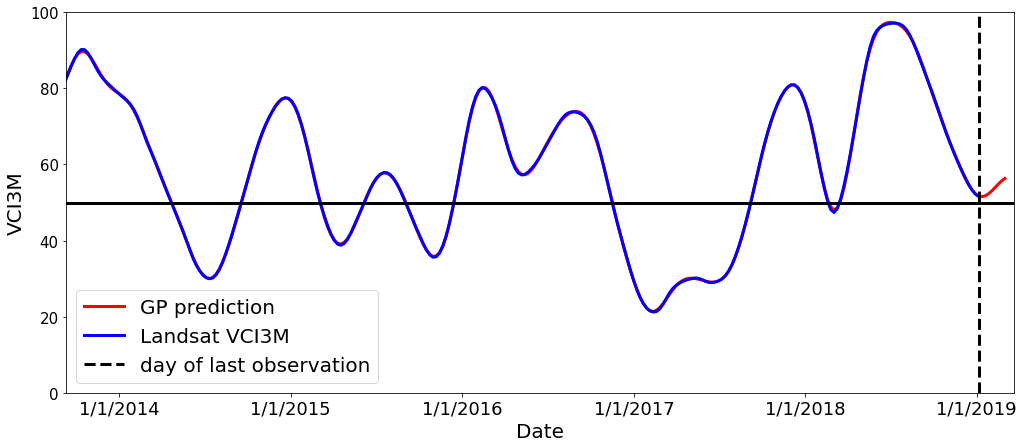

weeks  =  1 ,   VCI3M =  52
weeks  =  2 ,   VCI3M =  52
weeks  =  3 ,   VCI3M =  52
weeks  =  4 ,   VCI3M =  53
weeks  =  5 ,   VCI3M =  54
weeks  =  6 ,   VCI3M =  55
weeks  =  7 ,   VCI3M =  56
weeks  =  8 ,   VCI3M =  56


In [5]:
plot_func.plot_vci_fc3M(Xtest_use,mean,X,y)